## ## Week 3-1 - Linear Regression - class notebook

This notebook gives three examples of regression, that is, fitting a linear model to our data to find trends. For the finale, we're going to duplicate the analysis behind the Washington Post story 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Part 1 - Single variable regression
We'll start with some simple data on height and weight.

In [2]:
hw = pd.read_csv("height-weight.csv")
hw

,name,height,weight
0,Joyce,51.3,50.5
1,Louise,56.3,77.0
2,Alice,56.5,84.0
3,James,57.3,83.0
4,Thomas,57.5,85.0
5,John,59.0,99.5
6,Jane,59.8,84.5
7,Jeffrey,62.5,84.0
8,Janet,62.5,112.5
9,Carol,62.8,102.5


check distribution of each of these variables.

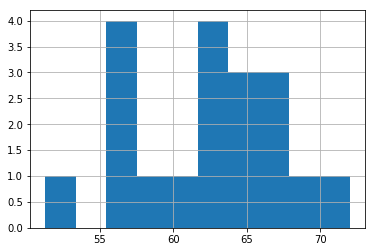

In [10]:
hw.height.hist()

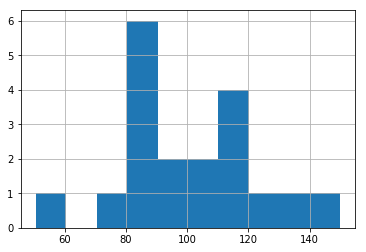

In [11]:
hw.weight.hist()

Use a scatter plot to see them together


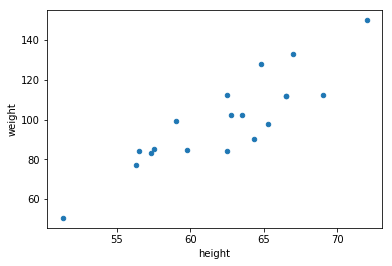

In [12]:
hw.plot(kind="scatter", x="height", y="weight") # seem to have positive correlation

To measure the strength of that trend or correlation, compute the correlation between weight and height with the `corr()`function


In [13]:
hw.corr()

,height,weight
height,1.000000,0.877785
weight,0.877785,1.000000


Build model to captuure trend using linear regression model. Check if a person is 80'' and 60'' tall then what is their weight ?

In [31]:
x = hw[['height']].values
y = hw[['weight']].values

In [32]:
#x = hw[['height']].values
#x

In [33]:
lm = LinearRegression() 
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Linear regression : y = mx +c 

In [37]:
m = lm.coef_[0] #selected so that it cn be 1D array and can be plotted below, else 
m

array([3.89903027])

In [38]:
b = lm.intercept_
b

array([-143.02691844])

We can plot this line `y=mx+b` on top of the scatterplot to see it.

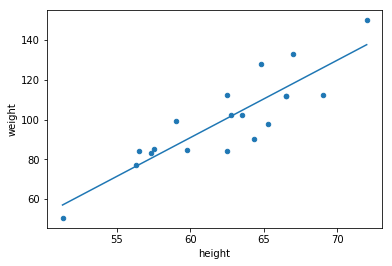

In [41]:
#hw.plot(kind='scatter',x='weight',y='height') incorrect definations
#plt.plot(hw.height, m*hw.height+b, '-')

hw.plot(kind="scatter", x="height", y="weight")
plt.plot(hw.height, m*hw.height+b, '-')

Enter values for 60'' and 80'' tall heights to get their corresponding weights

In [45]:
m*60 + b
m*80 + b

array([168.89550306])

or use lm.predict function

In [46]:
lm.predict(60)
lm.predict(80)

array([[168.89550306]])

## Part 2 - Multi-variable regression 

We can do essentially the same trick with one more independent variable. Then our regression equation is `y =  m1*x1 + m2*x2 + b`. We'll use one of the built-in `sklearn` data test as demonstration data.

In [47]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
diabetes = datasets.load_diabetes()

print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [49]:
df = pd.DataFrame(diabetes.data, columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
df.head()

# predictive variables # divided by std, - avg so that std=1, avg=0, explains why age is -ve as they have all been normalized


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262D68F0F98>,
      dtype=object)

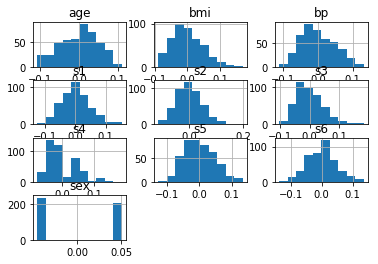

In [50]:
df.hist()

#distribution of 1 variable, marginal distribution 

In [51]:
# The variable we are trying to predict (it's not a DataFrame so we can't use head(), but this shows first 10 vals)
diabetes.target[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [6]:
# fit a regression
indices = (0, 2)

x = diabetes.data[:, indices] #age and Bmi selected
y = diabetes.target

lm2 = LinearRegression()
lm2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

fit a regression with multiple variables and then check the coefficients:

In [52]:
lm2.coef_  # 1 unit bmi - 900 change in target, 1 unit age has a change in traget by 133, #weight has more effect

array([133.01372901, 924.81645876])

Now we have *two* coefficients. They're both positive, which means that both age and BMI are associated with increased disease progression. We have an intercept too, the predicted value of the target variable when both age and BMI are zero (which never happens, but that's the way the math works)

In [53]:
lm2.intercept_

152.13348416289674

Below function used to plot outut in 3D to get regression plane


In [79]:
# Helpful function that we'll use later for making more 3D regression plots
def plot_regression_3d(x, y, z, model, elev=30, azim=30, xlab=None, ylab=None):
    fig = plt.figure()
    ax = Axes3D(fig, elev=elev, azim=azim)

    # taking four points at the corners of the plot
    # using predict() to determine their vertical position
   
    #defines the box on which the planes are contained
    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()
    corners_x = np.array([[xmin, xmin], [xmax, xmax]])
    corners_y = np.array([[ymin, ymax], [ymin, ymax]])
    corners_z = model.predict(np.array([[xmin, xmin, xmax, xmax], [ymin, ymax, ymin, ymax]]).T).reshape((2, 2))
    
    #plots the plane
    ax.plot_surface(corners_x, corners_y, corners_z, alpha=0.5)
    #plots the scatter points
    ax.scatter(x, y, z, alpha=0.3)

    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)


In [83]:
# Now plot our diabetes data
plot_regression_3d(x[:,0], x[:,1], y, lm2, elev=20, azim=0, xlab='age', ylab='BMI')

IndexError: index 1 is out of bounds for axis 1 with size 1

## Part 3 - Analysis of 2016 voters

Aside from prediction, we can use regression to attempt explanations. The coefficient `m` in the above encodes a guess about the existence and strength of the relationship between `x` and `y`. If it's zero, we guess that they're unrelated. Otherwise, it tells us how they are likely to vary together.

In this section we're going to try to understand what motivated people to vote for Trump but looking at the relationship between vote and other variables in the [2016 American National Election Study data](http://electionstudies.org/project/2016-time-series-study/). 

There were quite a few statistical analyses of this "why did Trump win?" kind after the election, by journalists and researchers. 

- [Racism motivated Trump voters more than authoritarianism](https://www.washingtonpost.com/news/monkey-cage/wp/2017/04/17/racism-motivated-trump-voters-more-than-authoritarianism-or-income-inequality) - Washington Post
- [The Rise of American Authoritarianism](https://www.vox.com/2016/3/1/11127424/trump-authoritarianism) - Vox
- [Education, Not Income, Predicted Who Would Vote For Trump](https://fivethirtyeight.com/features/education-not-income-predicted-who-would-vote-for-trump/) - 538
- [Why White Americans Voted for Trump – A Research Psychologist’s Analysis](https://techonomy.com/2018/02/white-americans-voted-trump-research-psychologists-analysis/) - Techonomy
- [Status threat, not economic hardship, explains the 2016 presidential vote](http://www.pnas.org/content/early/2018/04/18/1718155115) - Diana C. Mutz, PNAS
- [Trump thrives in areas that lack traditional news outlets](https://www.politico.com/story/2018/04/08/news-subscriptions-decline-donald-trump-voters-505605) - Politico
- [The Five Types of Trump Voters](https://www.voterstudygroup.org/publications/2016-elections/the-five-types-trump-
voters) - Voter Study Group

Many of these used regression, but some did not. My favoite is the Voter Study Group analysis which used clustering -- just like we learned last week. It has a good discussion of the problems with using a regression to answer this question. 

We're going to use regression anyway, along the lines of the [Washington Post piece](https://www.washingtonpost.com/news/monkey-cage/wp/2017/04/17/racism-motivated-trump-voters-more-than-authoritarianism-or-income-inequality/?utm_term=.01d9d3764f2c) which also uses ANES data. In particular, a regression on variables representing attitudes about authoritarianism and minorities.


In [84]:
# read 'anes_timeseries_2016_rawdata.csv'


anes = pd.read_csv('anes_timeseries_2016_rawdata.csv')
print(anes.shape)
anes.head()

C:\Users\aditi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (790,1129,1131) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(4271, 1290)


,version,V160001,V160101,V160101f,V160101w,V160102,V160102f,V160102w,V160201,V160201f,...,V168123,V168124,V168125,V168126,V168127,V168128,V168129,V168130,V168131,V168132
0,ANES2016TimeSeries_20171219,300001,0.827,0.887,0.0,0.842,0.927,0.0,121,21,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
1,ANES2016TimeSeries_20171219,300002,1.080,1.160,0.0,1.013,1.084,0.0,123,23,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,ANES2016TimeSeries_20171219,300003,0.387,0.416,0.0,0.367,0.398,0.0,121,21,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
3,ANES2016TimeSeries_20171219,300004,0.359,0.385,0.0,0.366,0.418,0.0,118,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,ANES2016TimeSeries_20171219,300006,0.647,0.693,0.0,0.646,0.726,0.0,113,13,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


The first thing we need to do is construct indices of "authoritarianism" and "racism" from answers to the survey questions. We're following exactly what the Washington Post did here. Are "authoritarianism" and "racism" accurate and/or useful words for indices constructed of these questions? Our choice of words will hugely shape the impression that readers come away with -- even if we do the exact same calculations.

We start by dropping everything we don't need: we keep only white voters, only people who voted, and just the cols we want

In [85]:
# drop non-white voters
white_col = 'V161310a'
anes = anes[anes[white_col]==1]
anes.shape

(3412, 1290)

In [86]:
# keep only Trump, Clinton voters
voted_col = 'V162034a' # 1=Clinton, 2=Trump, 3=Johnson, 4=Stein, negative numbers = didn't vote or won't say
anes = anes[(anes[voted_col]==1) | (anes[voted_col]==2)]
anes.shape

(2037, 1290)

In [88]:
# keep only columns on authoritarian, racial scales
authoritarian_cols = ['V162239','V162240','V162241','V162242']
racial_cols = ['V162211','V162212','V162213','V162214']
anes = anes[[voted_col] + authoritarian_cols + racial_cols]
anes.head()

,V162034a,V162239,V162240,V162241,V162242,V162211,V162212,V162213,V162214
0,2,2,2,1,1,1,5,5,1
1,2,1,2,2,1,3,2,4,3
7,2,2,2,2,2,4,5,5,2
13,2,2,2,2,1,2,5,4,3
14,1,1,1,2,1,4,1,2,5


Now we have to decode these values.

For the child-rearing questions, the code book tells us that 1 means the first option and 2 means the second. But 3 means both and then there are all sorts of codes that mean the question wasn't answered, in different ways. And then there's the issue that the questions have different directions: Options 1 might mean either "more" or "less" authoritarian. So we have a custom translation dictionary for each column. This is the stuff that dreams are made of, people.

In [89]:
# recode the authoritarian variables
# These variables are proxies for authoritarian attitudes. Why are these questiones about children? 
# Because that's the only way to get honest answers! It's a long story. 
# See https://www.vox.com/2016/3/1/11127424/trump-authoritarianism

# All authoritarian traits are coded 1 for first option and 2 for second
# We turn this into +1/0/-1 where +1 is the more authoritarian option, and 0 means no data

# Child trait more important: independence or respect
anes['V162239'].replace({1:-1, 2:1, 3:0, -6:0, -7:0, -8:0, -9:0}, inplace=True)

# Child trait more important: curiosity or good manners
anes['V162240'].replace({1:-1, 2:1, 3:0, -6:0, -7:0, -8:0, -9:0}, inplace=True)

# Child trait more important: obedience or self-reliance
anes['V162241'].replace({1:1, 2:-1, 3:0, -6:0, -7:0, -8:0, -9:0}, inplace=True)

# Child trait more important: considerate or well-behaved
anes['V162242'].replace({1:-1, 2:1, 3:0, -6:0, -7:0, -8:0, -9:0}, inplace=True)

In [90]:
# recode the racial variables
# All racial questions are coded on a five point scale, 1=agree strongy, 5=disagree strongly
# We recode so that least tolerant = +2 and most tolerant =-2

# Agree/disagree: blacks shd work way up w/o special favors
anes['V162211'].replace({1:2, 2:1, 3:0, 4:-1, 5:-2, -6:0, -7:0, -8:0, -9:0}, inplace=True)
        
# Agree/disagree: past slavery make more diff for blacks
anes['V162212'].replace({1:-2, 2:-1, 3:0, 4:1, 5:2, -6:0, -7:0, -8:0, -9:0}, inplace=True)

# Agree/disagree: blacks have gotten less than deserve
anes['V162213'].replace({1:-2, 2:-1, 3:0, 4:1, 5:2, -6:0, -7:0, -8:0, -9:0}, inplace=True)

anes['V162214'].replace({1:2, 2:1, 3:0, 4:-1, 5:-2, -6:0, -7:0, -8:0, -9:0}, inplace=True)

In [91]:
# check the results
anes.head()

,V162034a,V162239,V162240,V162241,V162242,V162211,V162212,V162213,V162214
0,2,1,1,1,-1,2,2,2,2
1,2,-1,1,-1,-1,0,-1,1,0
7,2,1,1,-1,1,-1,2,2,1
13,2,1,1,-1,-1,1,2,1,0
14,1,-1,-1,-1,-1,-1,-2,-1,-2


Finally, add the authority and racial columns together to form the composite indexes.

In [92]:
# sum each group of columns. End up with vote, authority, racial columns
anes['authority'] = anes[authoritarian_cols].sum(axis=1) # sum across rows , 0 is columns
anes['racial'] = anes[racial_cols].sum(axis=1)
anes['vote'] = anes[voted_col]
anes = anes[['vote','authority','racial']]
anes.head(10)


,vote,authority,racial
0,2,2,8
1,2,-2,0
7,2,2,4
13,2,0,4
14,1,-4,-6
16,1,-4,-4
17,2,4,4
18,1,-4,-6
21,2,-2,4
22,1,0,-1


Data prepared at last! Let's first look at the scatter plots

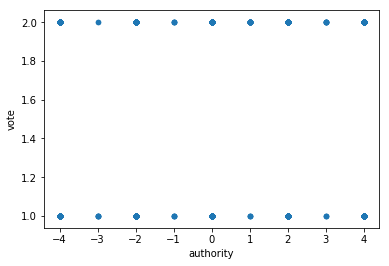

In [93]:
anes.plot(kind="scatter",x="authority", y="vote")

Er, right... all this says is that we've got votes for both candidates at all levels of authoritarianism. To get a sense of how many dots in each point, we can add some jitter and make the points a bit transparent.

In [94]:
# function to add noise to the values in the array
def jitter(arr):
    # pick a standard deviation for the jitter of 3% of the data range
    stdev = .02*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev


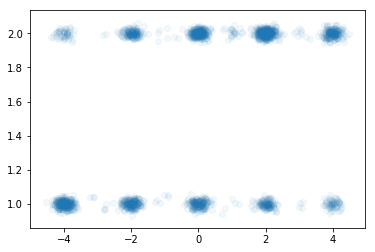

In [95]:
# plot vote vs authoritarian variables with jitter
plt.scatter(x=jitter(anes.authority), y=jitter(anes.vote), alpha=0.05)

Note that, generally, as you move to the right (more authoritarian) there are more Trump voters. We can do this same plot with the racial axis.

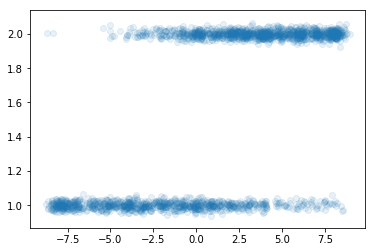

In [96]:
# plot vote vs racial variables with jitter
plt.scatter(x=jitter(anes.racial), y=jitter(anes.vote), alpha=0.1)

Similar deal. The axis is smoother because we are summing numbers from a five point agree/disagree scale, rather than just the two-option questions of the authoritarianism subplot. 

Now in glorious 3D.

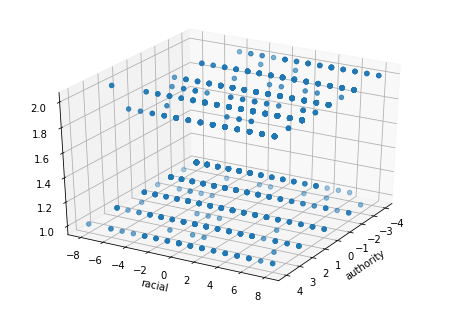

In [97]:
# 3D plot of both sets of vars

fig = plt.figure()
ax = Axes3D(fig, elev=30, azim=30)
ax.scatter(anes.authority, anes.racial, anes.vote)
ax.set_xlabel('authority')
ax.set_ylabel('racial');

Same problem: everything is on top of each other. Same solution.

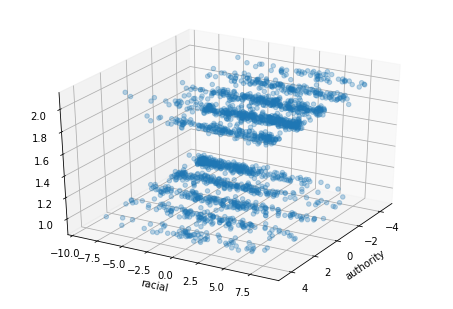

In [98]:
# jittered 3D plot
fig = plt.figure()
ax = Axes3D(fig, elev=30, azim=30)
ax.scatter(jitter(anes.authority), jitter(anes.racial), jitter(anes.vote), alpha=0.3)
ax.set_xlabel('authority')
ax.set_ylabel('racial');

You can definitely see the change alog both axes. But which factor matters more? Let's get quantitative by fitting a linear model. Regression to the rescue!

In [99]:

# This is some drudgery to convert the dataframe into the format that sklearn needs: 
data = np.asarray(anes)
x = data[:,1:] # an Nx2 matrix for the dependent variables
y = data[:,0]  # a N dimensional vector for the indpendent variable


In [102]:
# This does the actual regression
lm3=LinearRegression()
lm3.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

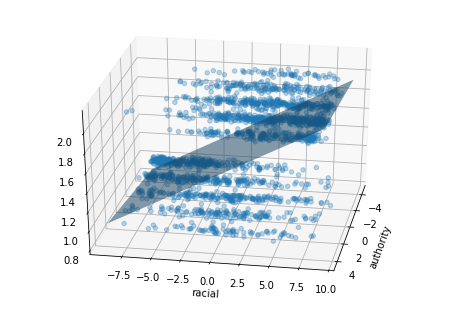

In [103]:
# call plot_regression_3d
plot_regression_3d(jitter(anes.authority), 
                   jitter(anes.racial), 
                   jitter(anes.vote), 
                   lm3, 
                   elev=30, 
                   azim=10, 
                   xlab='authority', 
                   ylab='racial')

Well that looks cool but doesn't really clear it up for me. Let's look at the coefficients.


In [104]:
lm3.coef_

array([0.02124645, 0.06037413])

Looks like the coefficient on `racial` is higher. But wait, we choose the numbers that we turned each response into! We could have coded `racial` on a +/-1 scale instead of a +/-2 scale, or a +/-10 scale. So... we could get any number we want just be changing how we convert the data.

To fix this, we're going to standardize the values (both dependent and independent) to have mean 0 and standard deviation 1. This gives us [standardized coefficients](https://en.wikipedia.org/wiki/Standardized_coefficient).

In [105]:
# normalize the columns and take a look
normalized_anes=(anes-anes.mean())/anes.std()
normalized_anes.head()

,vote,authority,racial
0,0.908220,0.766243,1.469289
1,0.908220,-0.774943,-0.216163
7,0.908220,0.766243,0.626563
13,0.908220,-0.004350,0.626563
14,-1.100514,-1.545537,-1.480252


In [107]:
# fit another regression
x = normalized_anes[['authority','racial']].values
y = normalized_anes[['vote']].values

lm4=LinearRegression()
lm4.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

What we have now is the same data, just scaled in each direction

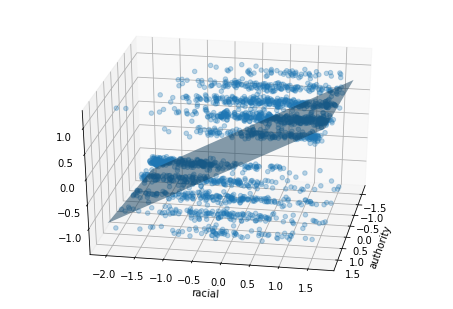

In [108]:
# call plot_regression_3d
plot_regression_3d(jitter(normalized_anes.authority), 
                   jitter(normalized_anes.racial), 
                   jitter(normalized_anes.vote), 
                   lm4, 
                   elev=30, 
                   azim=10, 
                   xlab='authority', 
                   ylab='racial')

Finally, we can compare the coefficients directly. It doesn't matter what range we used to code the survey answers, because we divided it out during normalization.


In [109]:
lm4.coef_

array([[0.11076786, 0.57563486]])

So there we have it. For white voters in the 2016 election, the standardized regression coefficient on racial factors is quite a bit bigger than the standardized coeffiecient on authoritrianism. But what does this actually mean?

In [110]:
# what's the new intercept?
lm4.intercept_

array([-1.19304588e-16])